Nhập các thư viện

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk("D:\\ĐAn"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

D:\ĐAn\bank-full.csv
D:\ĐAn\bank.ipynb
D:\ĐAn\bank_cleaned.csv
D:\ĐAn\bank_kiemtra.ipynb
D:\ĐAn\BAOCAO\14_7_ĐATN_Vũ Thị Hồng Gấm_1951064072.docx
D:\ĐAn\BAOCAO\Bao cao_Chuong1,2_VuThiHongGam.docx
D:\ĐAn\BAOCAO\Bản tóm tắt đề cương đồ án tốt nghiệp.docx
D:\ĐAn\BAOCAO\gốc_ĐATN_Vũ Thị Hồng Gấm_1951064072.docx
D:\ĐAn\BAOCAO\Huong dan trinh bay DATN (26-2-2020).docx
D:\ĐAn\BAOCAO\~$TN_Vũ Thị Hồng Gấm_1951064072.docx
D:\ĐAn\BAOCAO\ĐATN_Vũ Thị Hồng Gấm_1951064072.docx
D:\ĐAn\BAOCAO\ĐATN_Vũ Thị Hồng Gấm_1951064072.pdf
D:\ĐAn\ĐATN_Vũ Thị Hồng Gấm_1951064072\bank-full.csv
D:\ĐAn\ĐATN_Vũ Thị Hồng Gấm_1951064072\bank.ipynb
D:\ĐAn\ĐATN_Vũ Thị Hồng Gấm_1951064072\ĐATN_Vũ Thị Hồng Gấm_1951064072_checked.docx
D:\ĐAn\ảnh\6-ung-dung-thuc-te-pho-bien-nhat-cua-machine-learning-1-1024x639.png
D:\ĐAn\ảnh\Cac_phuong_phap_danh_gia_mo_hinh_AI_TAPIT-695x430.png
D:\ĐAn\ảnh\cayquyetdinh.png
D:\ĐAn\ảnh\hoc-may-ban-giam-sat.jpg
D:\ĐAn\ảnh\hoc-may-co-giam-sat.jpg
D:\ĐAn\ảnh\hoc-may-khong-giam-sat.jpg
D:\ĐAn\ảnh\machi

In [2]:
data = pd.read_csv("D:\\ĐAn\\bank-full.csv", sep=";")

### Khám phá dữ liệu

In [3]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

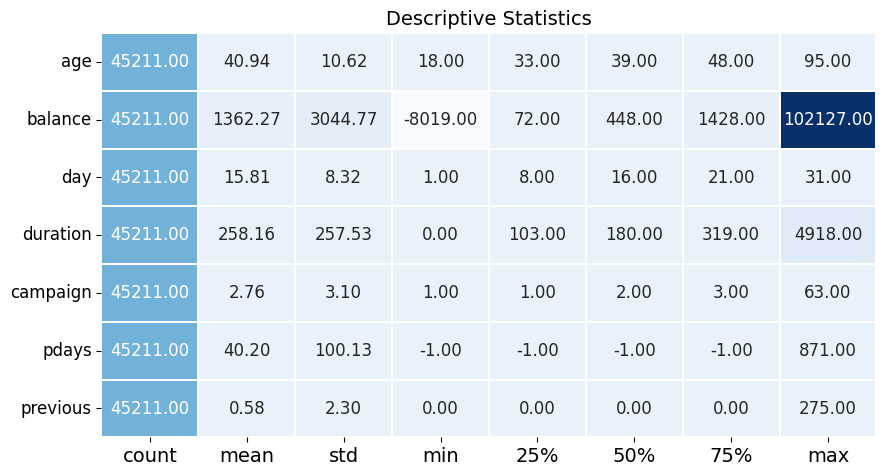

In [6]:
cols=data.select_dtypes(include=['float64','int64'])
cmap1 = 'Blues'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(cols)

##### check for missing values (kiểm tra giá trị thiếu)

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

---> không có giá trị nào bị thiếu 

In [8]:
data.shape

(45211, 17)

In [9]:
# Tính số lần xuất hiện 'unknown' và 'other' trong cột 'poutcome'
unknown_count = (data['poutcome'] == 'unknown').sum()
other_count = (data['poutcome'] == 'other').sum()

# Tính tổng số lượng giá trị trong cột 'poutcome'
total_count = len(data)

# Tính phần trăm của 'unknown' và 'other'
percentage_unknown = (unknown_count / total_count) * 100
percentage_other = (other_count / total_count) * 100

print("Percentage of 'unknown' in poutcome:", percentage_unknown)
print("Percentage of 'other' in poutcome:", percentage_other)

Percentage of 'unknown' in poutcome: 81.74780473778506
Percentage of 'other' in poutcome: 4.06980602065869


In [10]:
# Bỏ cột 'poutcome' khỏi tập dữ liệu
data = data.drop(columns=['poutcome'])

In [11]:
# Tính phần trăm giá trị 'unknown' trong mỗi cột
unknown_percentages = (data == 'unknown').mean() * 100

# Tính phần trăm giá trị 'unknown' trong mỗi hàng
unknown_percentages_in_rows = (data == 'unknown').mean(axis=1) * 100

# Tìm cột có phần trăm giá trị 'unknown' cao nhất
column_with_highest_percentage = unknown_percentages.idxmax()
highest_percentage_column = unknown_percentages.max()

# Tìm hàng có phần trăm giá trị 'unknown' cao nhất
row_with_highest_percentage = unknown_percentages_in_rows.idxmax()
highest_percentage_row = unknown_percentages_in_rows.max()

# In kết quả
print("Percentage of 'unknown' values in each column:")
print(unknown_percentages)
print("\nPercentage of 'unknown' values in each row:")
print(unknown_percentages_in_rows)
print("\nColumn with the highest percentage of 'unknown' values:")
print(f"Column: {column_with_highest_percentage}, Percentage: {highest_percentage_column:.2f}%")
print("\nRow with the highest percentage of 'unknown' values:")
print(f"Row: {row_with_highest_percentage}, Percentage: {highest_percentage_row:.2f}%")

Percentage of 'unknown' values in each column:
age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
dtype: float64

Percentage of 'unknown' values in each row:
0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64

Column with the highest percentage of 'unknown' values:
Column: contact, Percentage: 28.80%

Row with the highest percentage of 'unknown' values:
Row: 4, Percentage: 18.75%


In [12]:
# Vậy chúng ta sẽ xóa hàng index 4
data = data.drop(4)

## Tiền xử lý dữ liệu 

#### Xử lý các giá trị ngoại lai

<Axes: >

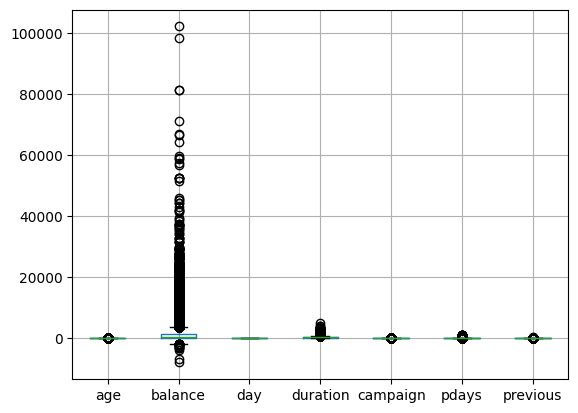

In [13]:
data.boxplot()

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

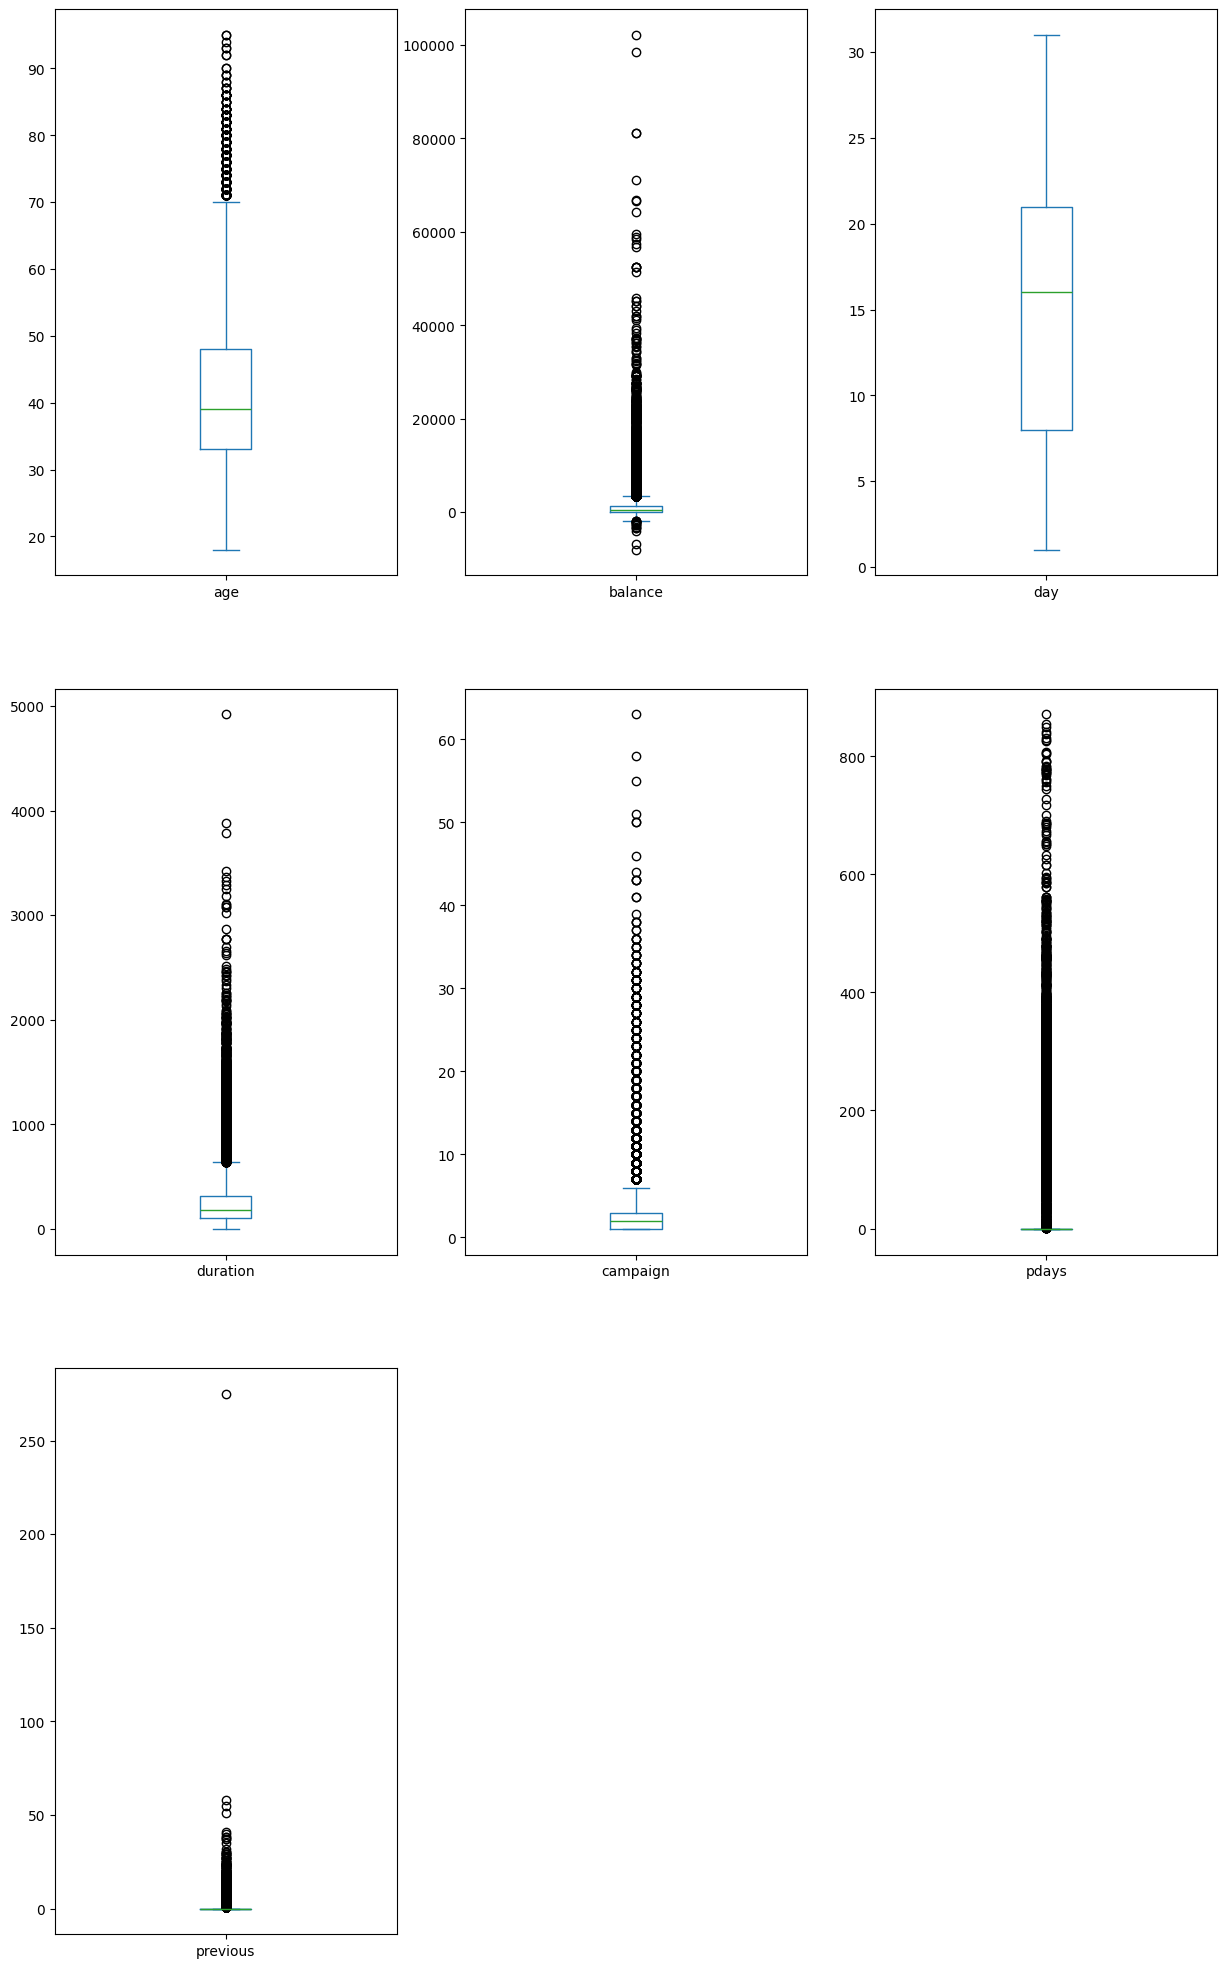

In [14]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

In [15]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# xác định các giá trị ngoại lai
outliers = data[(data['balance'] < lower_bound) | (data['balance'] > upper_bound)]

In [16]:
data = data[(data['balance'] >= lower_bound) & (data['balance'] <= upper_bound)]

In [17]:
Q1 = data['campaign'].quantile(0.10)
Q3 = data['campaign'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# xác định các giá trị ngoại lai
outliers = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]

data = data[(data['campaign'] >= lower_bound) & (data['campaign'] <= upper_bound)]

In [18]:
Q1 = data['duration'].quantile(0.20)
Q3 = data['duration'].quantile(0.80)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# xác định các giá trị ngoại lai
outliers = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]

data = data[(data['duration'] >= lower_bound) & (data['duration'] <= upper_bound)]

In [19]:
Q1 = data['previous'].quantile(0.05)
Q3 = data['previous'].quantile(0.95)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# xác định các giá trị ngoại lai
outliers = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]

data = data[(data['previous'] >= lower_bound) & (data['previous'] <= upper_bound)]

In [20]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# xác định các giá trị ngoại lai
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

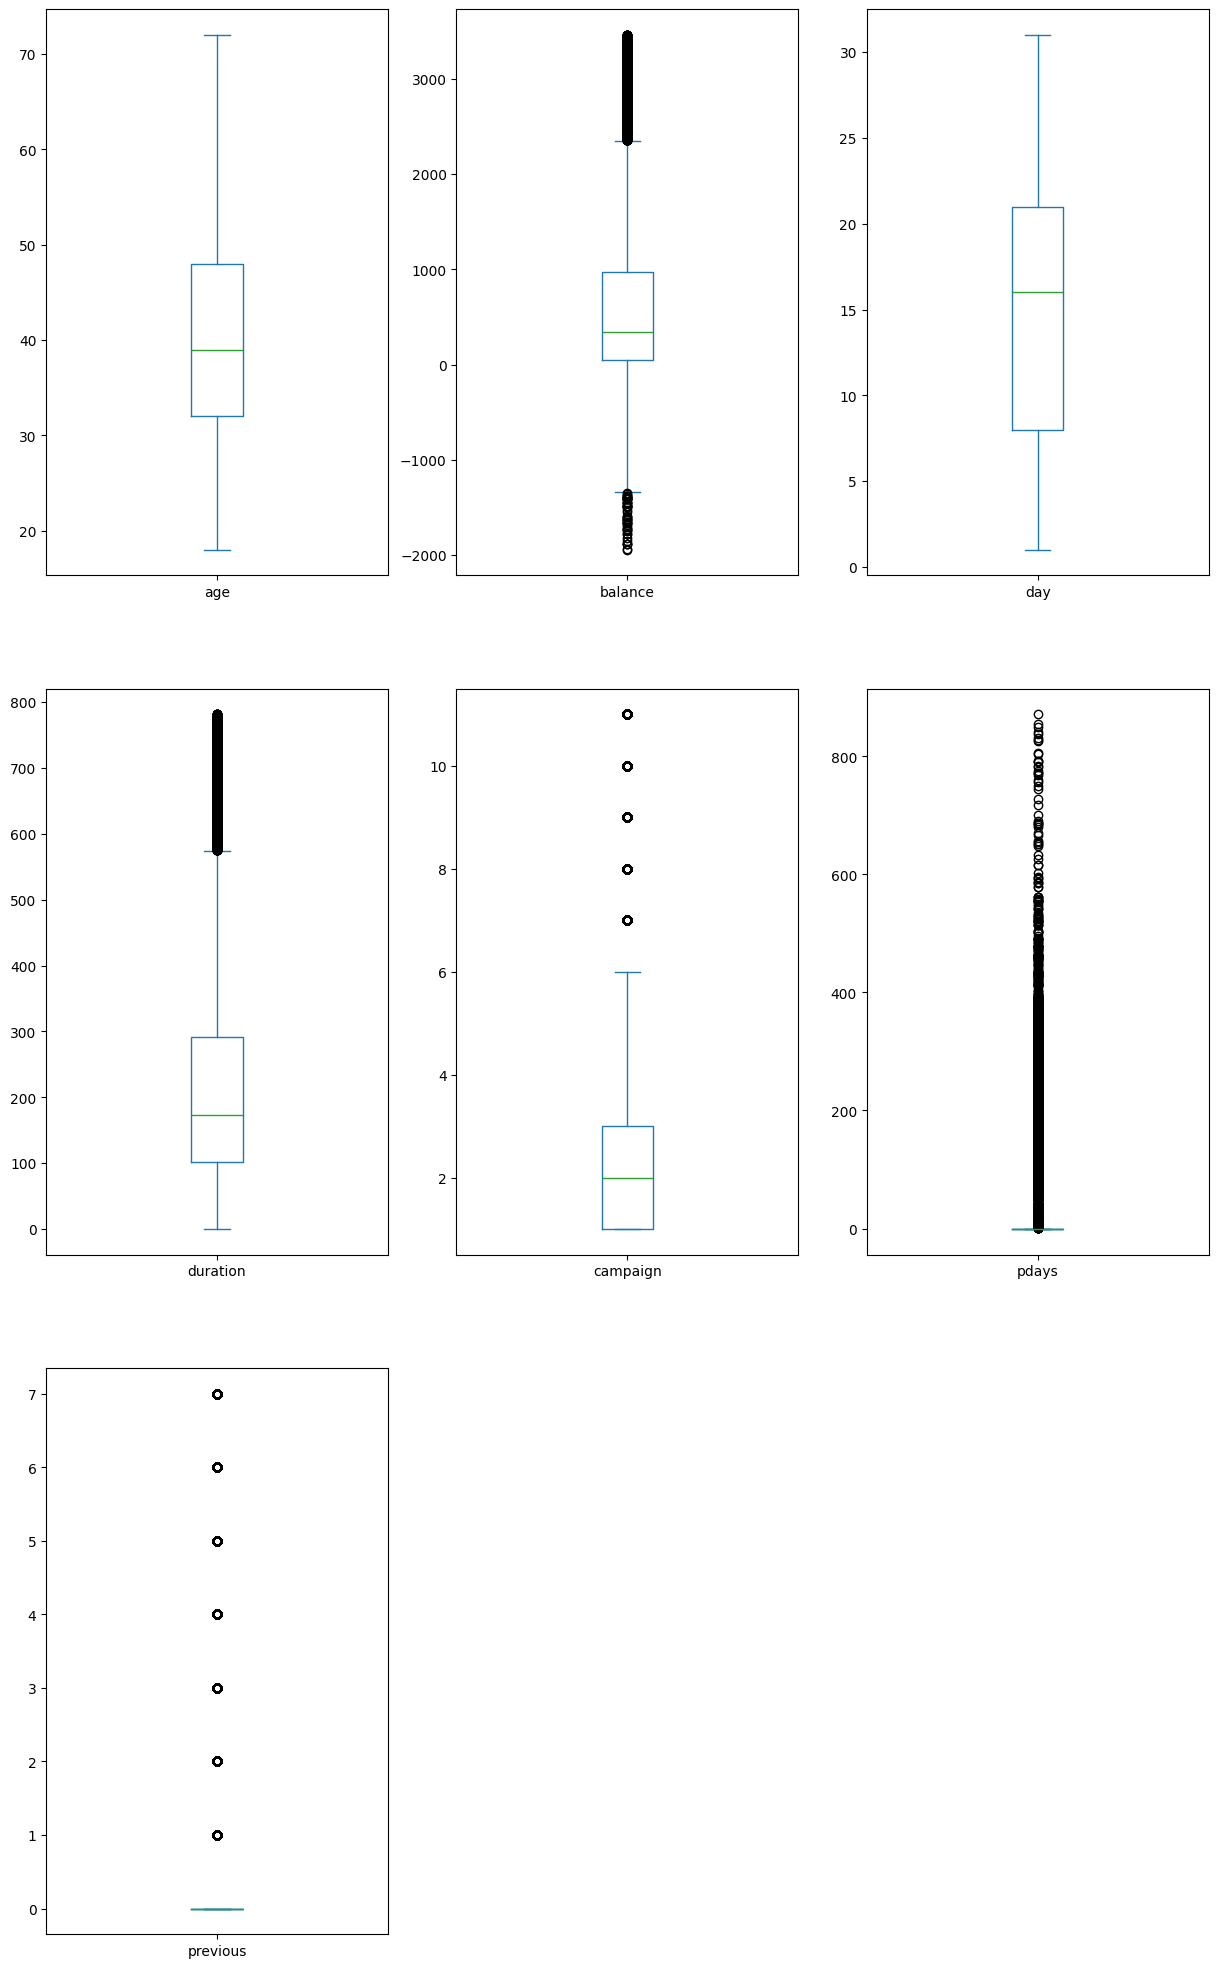

In [21]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

<Axes: >

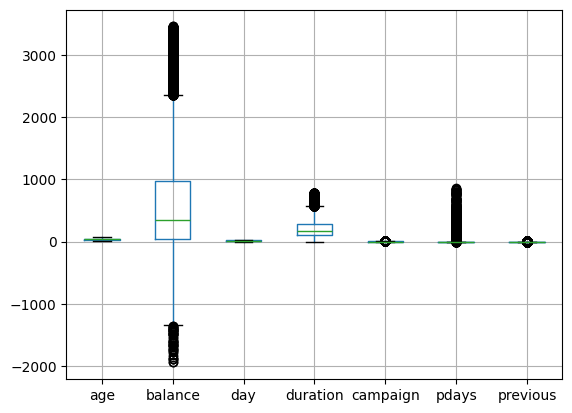

In [22]:
data.boxplot()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37058 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        37058 non-null  int64 
 1   job        37058 non-null  object
 2   marital    37058 non-null  object
 3   education  37058 non-null  object
 4   default    37058 non-null  object
 5   balance    37058 non-null  int64 
 6   housing    37058 non-null  object
 7   loan       37058 non-null  object
 8   contact    37058 non-null  object
 9   day        37058 non-null  int64 
 10  month      37058 non-null  object
 11  duration   37058 non-null  int64 
 12  campaign   37058 non-null  int64 
 13  pdays      37058 non-null  int64 
 14  previous   37058 non-null  int64 
 15  y          37058 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.8+ MB


In [24]:
data.shape

(37058, 16)

## Phân tích dữ liệu (EDA)

##### 1: Công việc có ảnh hưởng như thế nào đến khoản vay cá nhân (loans) như thế nào?

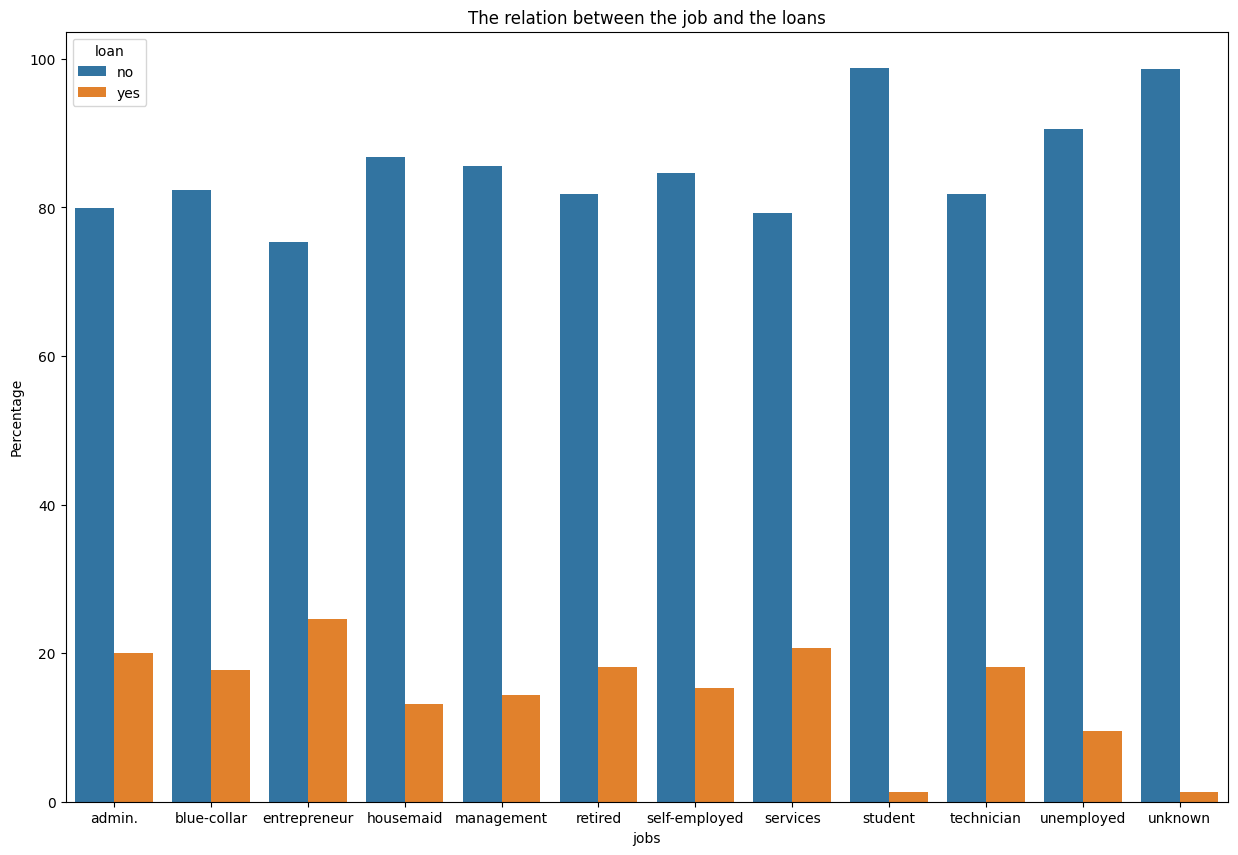

In [25]:
plt.figure(figsize=(15,10))

# Tính tỷ lệ phần trăm
df_percentages = data.groupby('job')['loan'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Vẽ dữ liệu
sns.barplot(x='job', y='percent', hue='loan', data=df_percentages) #palette=colors)

plt.title("The relation between the job and the loans")
plt.xlabel("jobs")
plt.ylabel("Percentage")

plt.show()

##### 2: Phương thức liên hệ nào hiệu quả hơn trong việc thuyết phục khách hàng đăng ký (y)?

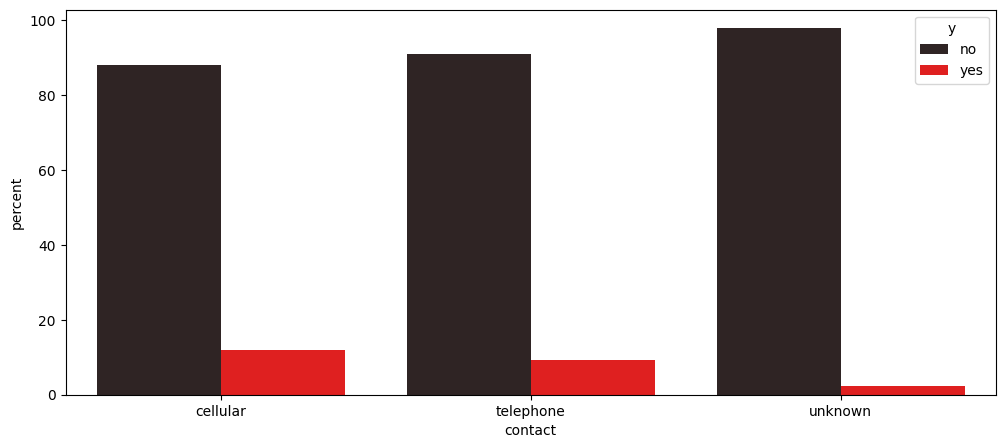

In [26]:
plt.figure(figsize=(12,5))

# Tỷ lệ phần trăm
df_percentages = data.groupby('contact')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Vẽ dữ liệu
sns.barplot(x='contact', y='percent', hue='y', data=df_percentages, color='red')

plt.show()

#### 3: Công việc ảnh hưởng đến y như thế nào?

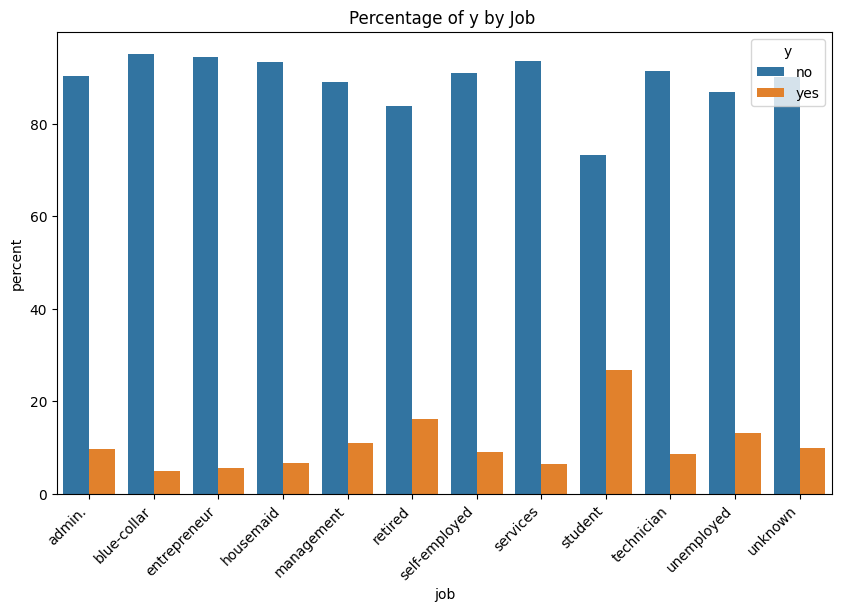

In [27]:
colors = ['#FFB90F', '#33FFA8']
grouped = data.groupby('job')['y'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Tạo biểu đồ thanh
plt.figure(figsize=(10,6))
ax = sns.barplot(x='job', y='percent', hue='y', data=grouped)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Percentage of y by Job ')
plt.show()

##### 4: Tình trạng hôn nhân ảnh hưởng đến y như thế nào?

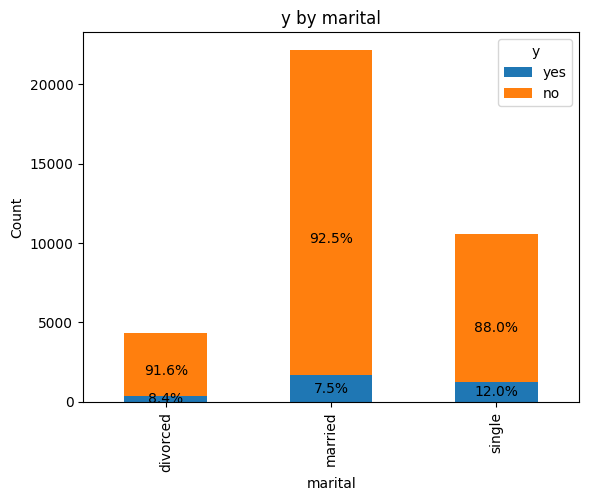

In [28]:
# xắp xếp lại các cột
grouped = data.groupby('marital')['y'].value_counts().unstack()[['yes', 'no']]

# vẽ dữ liệu
grouped.plot(kind='bar', stacked=True)

plt.title('y by marital')
plt.xlabel('marital')
plt.ylabel('Count')
plt.legend(title='y')

# Tính giá trị phần trăm cho mỗi thanh
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Thêm các chú thích vào biểu đồ
for i in range(len(grouped)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        plt.text(i, value / 2, f'{percentage:.1f}%', ha='center', va='center')

plt.show()

##### 5: Thời lượng liên lạc cuối cùng (duration) ảnh hưởng đến y như thế nào

In [29]:
import plotly.io as pio

fig = px.histogram(data, x='duration', color='y')
fig.show()


##### 6: Tình trạng tài chính (Balance) ảnh hưởng như thế nào đến quyết định đăng ký?

In [30]:
fig = px.histogram(data,x='balance',color='y')
fig.show()

##### 7: Độ tuổi ảnh hưởng đến y như thế nào?

In [31]:
fig = px.histogram(data,x='age',color='y')
fig.show()

##### 8: Khoản vay mua nhà (housing) ảnh hưởng đến y như thế nào?

In [32]:
# Tính số lượng cho mỗi nhóm
grouped_df = data.groupby(['housing', 'y']).size().reset_index(name='counts')

# Tính tỷ số phần trăm của mỗi nhóm
percentages = grouped_df.groupby('housing')['counts'].apply(lambda x: x / x.sum() * 100).reset_index(level=0, drop=True)

# Gán tỷ lệ phần trăm cho một cột mới trong grouped_df
grouped_df['percentages'] = percentages

# Tạo biểu đồ thanh
fig = px.bar(grouped_df, x='housing', y='counts', color='y',
             text=grouped_df['percentages'].apply(lambda x: f'{x:.2f}%'))

fig.show()

##### 9: Nhóm đối tượng chính dựa trên đặc điểm (education) ảnh hưởng tới y như thế nào?

In [33]:
fig = px.histogram(data, x="y",color = 'education')
fig.show()

##### 10: Nợ tính dụng (default) ảnh hưởng đến y như thế nào?

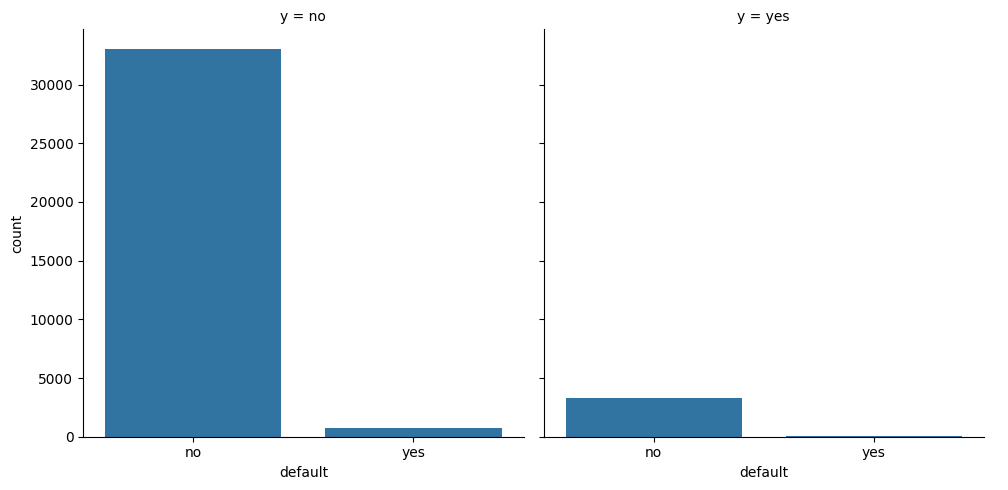

In [34]:
sns.catplot(data=data , x="default" , col="y",kind='count')

##### Kết luận:

Q1: Sinh viên có xác suất vay cá nhân thấp hơn, trong khi các công việc kỹ thuật và kinh doanh như doanh nhân, kỹ thuật viên và quản lý có xu hướng vay cá nhân nhiều hơn.

Q2: Điện thoại di động (Cellular) nhìn chung thuận lợi hơn trong việc thuyết phục khách hàng đăng ký gửi tiền có kỳ hạn.

Q3: Sinh viên có nhiều khả năng đăng ký gửi tiền có kỳ hạn hơn bất kỳ lĩnh vực nào khác.

Q4: mặc dù có tỷ lệ thấp hơn khách hàng đã lập gia đình nhưng các khách hàng độc thân có xu hướng sử dụng tiền gửi có kỳ hạn nhiều hơn.

Q5: Thời gian thuyết phục khách hàng càng dài thì khả năng khách hàng đăng ký gửi tiền gửi có kỳ hạn càng cao.

Q6: Khách hàng có số dư từ 0 đến 1000 có nhiều khả năng sử dụng tiền gửi có kỳ hạn hơn.

Q7: Độ tuổi dưới 50,60 có cơ hội đăng ký gửi tiền có kỳ hạn cao hơn.

Q8: Khách hàng không có khoản vay mượn nhà ở có xu hướng sử dụng tiền gửi có kỳ hạn nhiều hơn.

Q9: Khách hàng có trình độ Trung học (Secondary) có nhiều khả năng sử dụng tiền gửi có kỳ hạn hơn.

Q10: Khách hàng nợ quá hạn thường không được đăng ký gửi tiền có kỳ hạn.

## Mã hóa dữ liệu (Encoding)

In [35]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes


In [36]:
cat_features = data.select_dtypes(include=['object', 'bool']).columns.values
print(cat_features)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'y']


In [37]:
# Áp dụng mã hóa One-hot cho các cột phân loại
data_encoded = pd.get_dummies(data, columns=['job', 'marital',  'contact', 'default', 'housing', 'loan'])

In [38]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo bộ mã hóa nhãnh LabelEncoder
label_encoder = LabelEncoder()

# Fit và chuyển đổi cột 'y' thành giá trị số
data_encoded['y'] = label_encoder.fit_transform(data_encoded['y'])

In [39]:
data_encoded['month'] = label_encoder.fit_transform(data_encoded['month'])

In [40]:
data_encoded['education'] = label_encoder.fit_transform(data_encoded['education'])

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2143,5,8,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False
1,44,1,29,5,8,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,True,False
2,33,1,2,5,8,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,True
3,47,3,1506,5,8,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False
5,35,2,231,5,8,139,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,1,557,17,9,224,1,-1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False
45203,23,2,113,17,9,266,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True,False,False,True
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False


In [43]:
# Bỏ các cột liên quan đến danh mục 'unknown'
unknown_columns = ['job_unknown', 'contact_unknown']

data_encoded.drop(unknown_columns, axis=1, inplace=True)

In [44]:
data_encoded

,age,education,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2,2143,5,8,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
1,44,1,29,5,8,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False
2,33,1,2,5,8,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True
3,47,3,1506,5,8,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
5,35,2,231,5,8,139,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,1,557,17,9,224,1,-1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,True,False
45203,23,2,113,17,9,266,1,-1,0,1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False
45205,25,1,505,17,9,386,2,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,True,False,False,True
45207,71,0,1729,17,9,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False


In [45]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37058 entries, 0 to 45209
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                37058 non-null  int64
 1   education          37058 non-null  int32
 2   balance            37058 non-null  int64
 3   day                37058 non-null  int64
 4   month              37058 non-null  int32
 5   duration           37058 non-null  int64
 6   campaign           37058 non-null  int64
 7   pdays              37058 non-null  int64
 8   previous           37058 non-null  int64
 9   y                  37058 non-null  int32
 10  job_admin.         37058 non-null  bool 
 11  job_blue-collar    37058 non-null  bool 
 12  job_entrepreneur   37058 non-null  bool 
 13  job_housemaid      37058 non-null  bool 
 14  job_management     37058 non-null  bool 
 15  job_retired        37058 non-null  bool 
 16  job_self-employed  37058 non-null  bool 
 17  job_services     

In [46]:
data_encoded.shape

(37058, 32)

### Xử lý dữ liệu mất cân bằng
##### Tách dữ liệu

In [47]:

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']

In [48]:
X.shape

(37058, 31)

In [49]:
y.shape

(37058,)

#### Lấy mẫu (Sampling)

In [50]:
# Tính số lượng 'yes' và 'no' trong cột 'y'
yes_count = (data['y'] == 'yes').sum()
no_count = (data['y'] == 'no').sum()

# Tổng số giá trị trong cột 'y'
total_count = len(data)

# Tính tỷ lệ phần trăm 'yes' và 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("before sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)

before sampling
Percentage of 'yes' in 'y': 8.902261320092828
Percentage of 'no' in 'y': 91.09773867990717


In [51]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


In [52]:
# Ghép nối 'X' và 'y' mẫu DataFrame mới
resampled_data = pd.concat([X_resampled, pd.Series(y_resampled, name='y')], axis=1)

In [53]:
resampled_data.shape 

(6598, 32)

tổng số yes: 3299
tổng số no: 3299
After sampling
Percentage of 'yes' in 'y': 50.0
Percentage of 'no' in 'y': 50.0


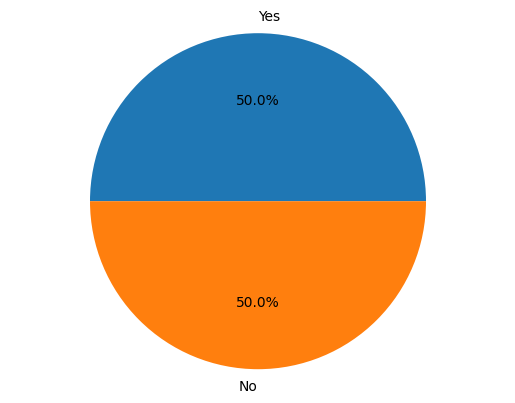

In [54]:
# Tính lại số lượng 'yes' và 'no' trong cột 'y'
yes_count = (resampled_data['y'] == 1).sum()
no_count = (resampled_data['y'] == 0).sum()
print("tổng số yes:", yes_count)
print("tổng số no:", no_count)

# Tính lại tổng số giá trị trong cột 'y'
total_count = len(resampled_data)

# Tính lại tỷ lệ phần trăm 'yes' và 'no'
percentage_yes = (yes_count / total_count) * 100
percentage_no = (no_count / total_count) * 100
print("After sampling")
print("Percentage of 'yes' in 'y':", percentage_yes)
print("Percentage of 'no' in 'y':", percentage_no)


# Tạo biểu đồ hình tròn
labels = ['Yes', 'No']
sizes = [percentage_yes, percentage_no]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Tỷ lệ khung hình bằng nhau đảm bảo rằng hình vẽ dưới dạng hình tròn.
plt.show()

#### Phân chia lại dữ liệu (splitting Resampled Data) sau khi lấy mẫu

In [55]:
from sklearn.model_selection import train_test_split
# Tách các đặc điểm (X) và biến mục tiêu (y) khỏi dữ liệu sau khi được lấy mẫu lại
X_resampled = resampled_data.drop('y', axis=1)
y_resampled = resampled_data['y']

# Chia dữ liệu thành các tập huấn luyện và kiểm tra ( 80% huấn luyện (train) và 20% cho kiểm tra (test))
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Mô hình hóa (Modeling)

#### 1. Hồi quy Logistic (Logistic Regression)

In [56]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình
model_lr = LogisticRegression()

# Huấn luyện mô hình
model_lr.fit(X_train, y_train)

LogisticRegression()

Training Accuracy: 0.7743463433118606
Accuracy: 0.7439393939393939
precision: 0.7355623100303952
recall: 0.7469135802469136
F1-score: 0.7411944869831547

Confusion Matrix for Test Set:
[[498 174]
 [164 484]]


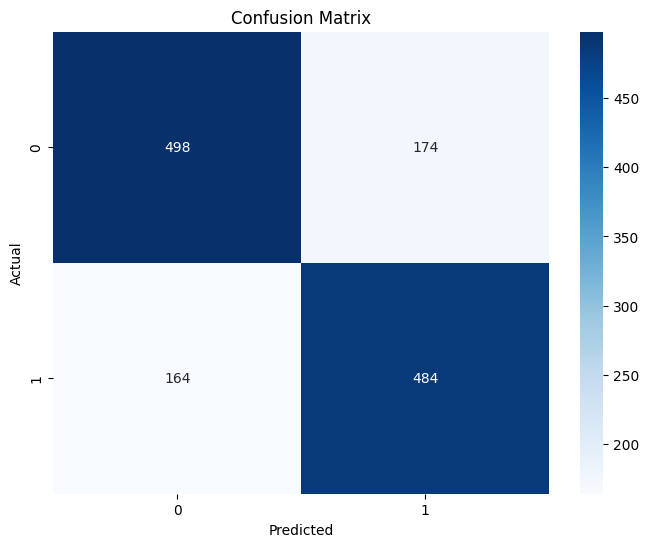

In [57]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Đưa ra dự đoán về dữ liệu huấn luyện
y_train_lr = model_lr.predict(X_train)

# Tính toán và in ra chính xác cho tập huấn luyện 
train_accuracy = accuracy_score(y_train, y_train_lr)
print("Training Accuracy:", train_accuracy)

# Đưa ra dự đoán trên tập kiểm tra
y_pred_lr = model_lr.predict(X_test)

# Tính toán độ chính xác
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_lr) 
print("precision:", precision)
recall = metrics.recall_score(y_test, y_pred_lr) 
print("recall:", recall)
f1_score = metrics.f1_score(y_test, y_pred_lr) 
print("F1-score:", f1_score)

# Tạo ra ma trận nhẫm lẫn cho tập kiểm tra
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred_lr))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Điều chỉnh siêu tham số

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {                                  # param_grid: Đây là từ điển chứa các siêu tham số mà chúng ta muốn thử nghiệm.
    'C': [0.1, 1, 10],                          # 'C': tham số nghịch đảo của regularization. giá trị C càng lớn thì regularization càng giảm. điều nàu có thể được sử dụng để kiểm soát độ phức tạp của mô hình.
    'penalty': ['l1', 'l2'],                    # penalty: sử dụng trong quá trình huấn luyện để tránh quá khớp. các giá trị phổ biến là 11 (norm 1 regularization), 12 (norm 2 regularization) hoặc None (k sử dụng regularization)
    'solver': ['liblinear', 'saga']             # solver: thuật toán được sử dụng để tối ưu hàm mất mát
                                                # 'liblinear' và 'saga' là hai trong số những thuật toán tối ưu hóa có sẵn cho Logistic Regression
}
# Sử dụng GridSearchCV để tìm kiếm siêu tham số tối ưu
grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid, cv=5, scoring='accuracy')  # GridSearchCV: Đây là hàm được sử dụng để thực hiện tìm kiếm lưới các siêu tham số tối ưu.
                                                                                          # model_lr: Mô hình Logistic Regression mà bạn đang tối ưu hóa.
                                                                                          # param_grid=param_grid: Từ điển các siêu tham số mà bạn muốn thử nghiệm.
                                                                                          # cv=5: Số lượng folds trong k-fold cross-validation. Điều này có nghĩa là dữ liệu sẽ được chia thành 5 phần, và mô hình sẽ được huấn luyện và kiểm tra 5 lần, mỗi lần sử dụng một phần khác nhau của dữ liệu làm tập kiểm tra và phần còn lại làm tập huấn luyện.
                                                                                          # scoring='accuracy': Thước đo đánh giá hiệu suất của mô hình. Ở đây, bạn đang sử dụng độ chính xác (accuracy) làm thước đo đánh giá.
                                                                                          
grid_search_lr.fit(X_train, y_train)              # fit: Hàm này thực hiện việc huấn luyện mô hình trên tập dữ liệu huấn luyện (X_train, y_train) sử dụng tất cả các tổ hợp của các siêu tham số được xác định trong param_grid. 
                                                  #GridSearchCV sẽ tự động thử nghiệm tất cả các tổ hợp của các siêu tham số và sử dụng k-fold cross-validation để đánh giá hiệu suất của từng tổ hợp. 
                                                  #Kết quả là siêu tham số tối ưu sẽ được tìm ra dựa trên thước đo đánh giá đã chỉ định (ở đây là độ chính xác).                                         
# Nhận siêu tham số tốt nhất
best_params_lr = grid_search_lr.best_params_ 

In [59]:
# In ra siêu tham số tốt nhất
print("Best parameters found: ", best_params_lr)

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Training Accuracy: 0.8004926108374384
Accuracy: 0.7689393939393939
precision: 0.765891472868217
recall: 0.7623456790123457
F1-score: 0.7641144624903325

Confusion Matrix for Test Set:
[[521 151]
 [154 494]]


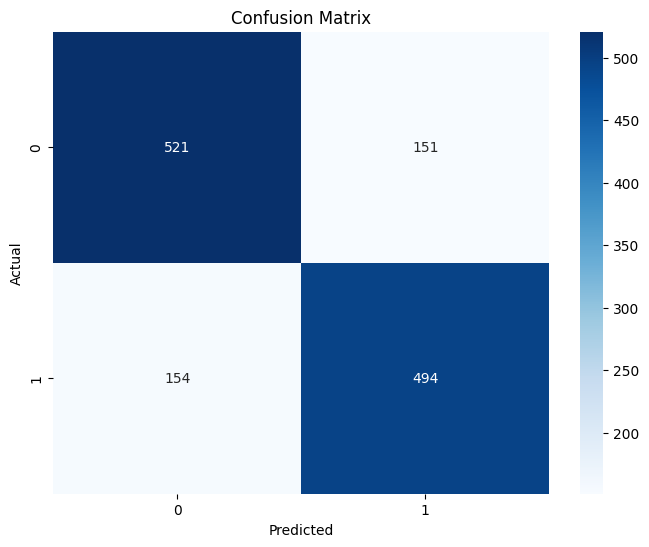

In [60]:
# Đưa ra dự đoán về dữ liệu huấn luyện
y_train_bestlr = grid_search_lr.predict(X_train)

# Tính toán và in ra chính xác cho tập huấn luyện 
train_accuracy = accuracy_score(y_train,y_train_bestlr)
print("Training Accuracy:", train_accuracy) 

y_best_lr = grid_search_lr.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_best_lr)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_best_lr) 
print("precision:", precision)
recall = metrics.recall_score(y_test, y_best_lr) 
print("recall:", recall)
f1_score = metrics.f1_score(y_test, y_best_lr) 
print("F1-score:", f1_score)
# Tạo ma trận nhầm lẫn cho tập kiểm tra
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test,y_best_lr))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_best_lr), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 2. Rừng ngẫu nhiên (Random Forest)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [63]:
y_pred_rf1 = clf.predict(X_test)

Đánh giá hiệu suất mô hình

Training Accuracy: 1.0
Accuracy: 0.8340909090909091
precision: 0.8104196816208393
recall: 0.8641975308641975
F1-score: 0.8364451082897685

Confusion Matrix for Test Set:
[[541 131]
 [ 88 560]]


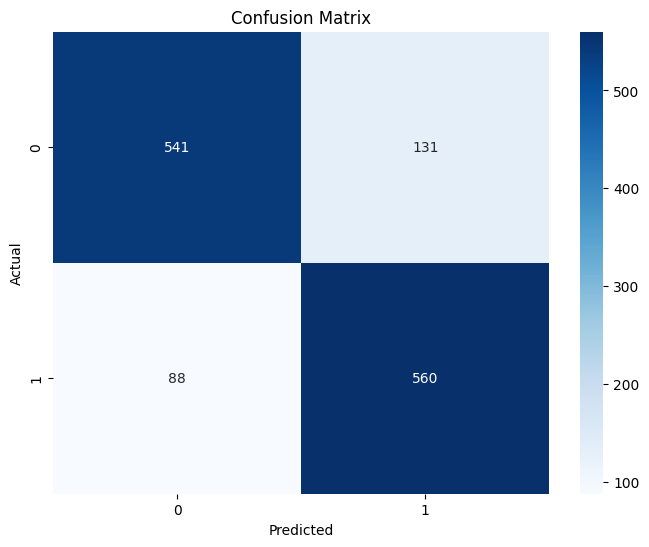

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Đưa ra dự đoán về dữ liệu huấn luyện
y_train_rf1 = clf.predict(X_train)

# Tính toán và in ra chính xác cho tập huấn luyện 
train_accuracy = accuracy_score(y_train, y_train_rf1)
print("Training Accuracy:", train_accuracy)

# Tạo báo cáo phân loại cho tập kiểm tra
accuracy = metrics.accuracy_score(y_test, y_pred_rf1)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_rf1) 
print("precision:", precision)
recall = metrics.recall_score(y_test, y_pred_rf1) 
print("recall:", recall)
f1_score = metrics.f1_score(y_test, y_pred_rf1) 
print("F1-score:", f1_score)

# Tạo ma trận nhầm lẫn cho tập kiểm tra
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred_rf1))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf1), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Điều chỉnh siêu tham số

In [65]:
# Xác định lưới siêu tham số:
from sklearn.model_selection import GridSearchCV
param_grid = {                              
    'n_estimators': [150, 200, 300],       # n_estimators: Số lượng cây trong rừng (100, 200, 300).
    'max_depth': [ None, 10, 20],           # max_depth: Độ sâu tối đa của cây (None, 10, 20). None nghĩa là không giới hạn độ sâu
    
}

# Thực hiện tìm kiếm lưới
grid_search_rf = GridSearchCV(clf, param_grid, cv=3)    
                                                     
# Huấn luyện mô hình với các tổ hợp siêu tham số:
grid_search_rf.fit(X_train, y_train)    

# Nhận siêu tham số tốt nhất
best_params_rf = grid_search_rf.best_params_ 

In [66]:
# In ra siêu tham số tốt nhất
print("Best parameters found: ", best_params_rf)


Best parameters found:  {'max_depth': 20, 'n_estimators': 300}


Training Accuracy: 1.0
Accuracy: 0.8340909090909091
precision: 0.8086330935251799
recall: 0.8672839506172839
F1-score: 0.8369322412509308

Confusion Matrix for Test Set:
[[539 133]
 [ 86 562]]


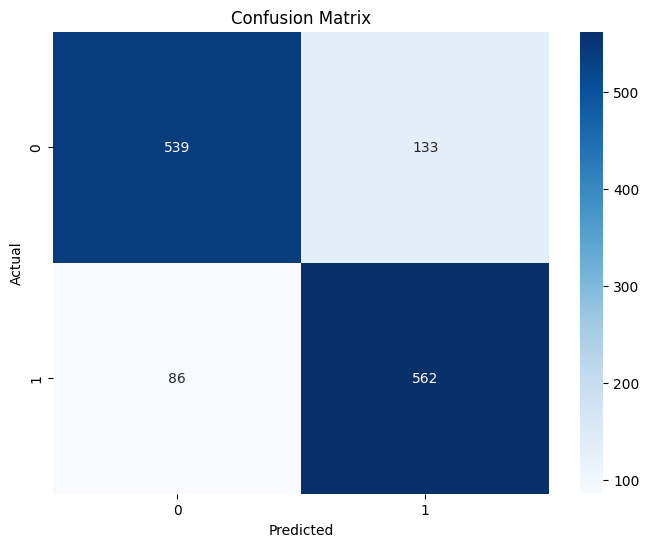

In [67]:
# Đưa ra dự đoán về dữ liệu huấn luyện
y_train_bestrf = grid_search_rf.predict(X_train)

# Tính toán và in ra chính xác cho tập huấn luyện 
train_accuracy = accuracy_score(y_train,y_train_bestrf)
print("Training Accuracy:", train_accuracy) 


y_best_rf = grid_search_rf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_best_rf)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_best_rf) 
print("precision:", precision)
recall = metrics.recall_score(y_test, y_best_rf) 
print("recall:", recall)
f1_score = metrics.f1_score(y_test, y_best_rf) 
print("F1-score:", f1_score)
# Tạo ma trận nhầm lẫn cho tập kiểm tra
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_best_rf))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_best_rf), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 3. Cây quyết định (Decision Tree)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
clf3 = DecisionTreeClassifier(random_state=42)

# Đào tạo mô hình
clf3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
y_pred_dt1 = clf3.predict(X_test)

Training Accuracy: 1.0
Accuracy: 0.7803030303030303
precision: 0.7679640718562875
recall: 0.7916666666666666
F1-score: 0.7796352583586627

Confusion Matrix for Test Set:
[[517 155]
 [135 513]]


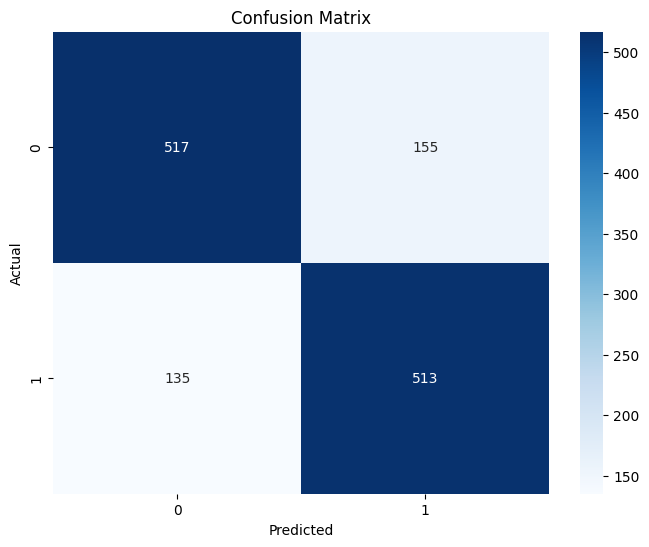

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Đưa ra dự đoán về dữ liệu huấn luyện
y_train_preddt1 = clf3.predict(X_train)

# Tính toán và in chính xác cho tập huấn luyện
train_accuracy = accuracy_score(y_train, y_train_preddt1)
print("Training Accuracy:", train_accuracy)

# Tạo báo cáo phân loại cho tập kiểm tra
accuracy = metrics.accuracy_score(y_test, y_pred_dt1)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_pred_dt1) 
print("precision:", precision)
recall = metrics.recall_score(y_test, y_pred_dt1) 
print("recall:", recall)
f1_score = metrics.f1_score(y_test, y_pred_dt1) 
print("F1-score:", f1_score)

# Tạo ma trận nhầm lẫn cho tập kiểm tra
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred_dt1))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt1), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Điều chỉnh siêu tham số

In [75]:
from sklearn.model_selection import GridSearchCV

# Xác định lưới siêu tham số để điều chỉnh
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Thực hiện tìm kiếm lưới
grid_search_dt = GridSearchCV(clf3, param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

# Nhận siêu tham số tốt nhất
best_params = grid_search_dt.best_params_


In [76]:
# In ra siêu tham số tốt nhất
print("Best parameters found: ", best_params)

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


Training Accuracy: 0.9054566123531641
Accuracy: 0.8090909090909091
precision: 0.7955223880597015
recall: 0.8225308641975309
F1-score: 0.8088012139605463

Confusion Matrix for Test Set:
[[535 137]
 [115 533]]


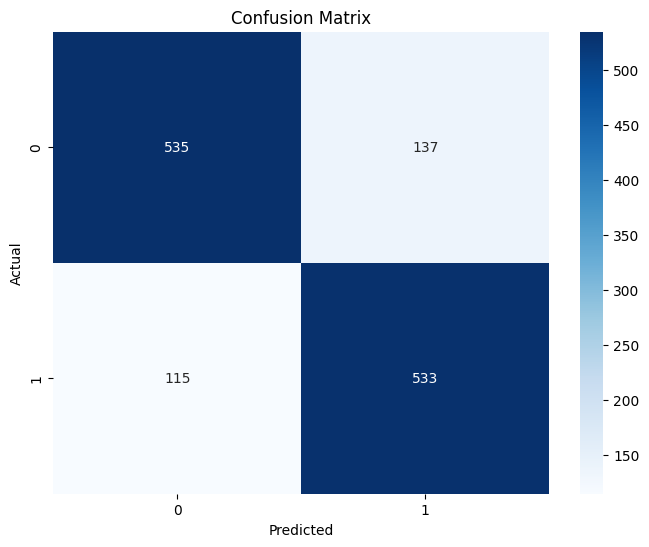

In [77]:
# Đưa ra dự đoán về dữ liệu huấn luyện
y_train_bestdt1 = grid_search_dt.predict(X_train)

# Tính toán và in chính xác cho tập huấn luyện
train_accuracy = accuracy_score(y_train, y_train_bestdt1)
print("Training Accuracy:", train_accuracy)

y_best_dt = grid_search_dt.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_best_dt)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, y_best_dt) 
print("precision:", precision)
recall = metrics.recall_score(y_test, y_best_dt) 
print("recall:", recall)
f1_score = metrics.f1_score(y_test, y_best_dt) 
print("F1-score:", f1_score)

print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test,y_best_dt))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_best_dt), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()